# Model of the temperature sensor

In [29]:
%load_ext autoreload
%autoreload 2
## Normal imports
import pandas as pd
import yaml
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
import re
import os
import sys
import scipy.constants as const


k_q = const.k/const.e
T0 = 273.15
sys.path.append(".")

#- Get the latest simulation model
from sim.LELO_TEMP.tran import calcTemperatureFromFreq 

#- Get the model for calculating the frequency from the temperature
import model

import importlib
importlib.reload(model)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<module 'model' from 'z:\\home\\cawu\\pro\\aicex\\ip\\lelo_temp_sky130a\\model.py'>

In [ ]:
#-CTAT voltage
dvd_dT = k_q*(- 3*np.log(T0 + 25))
print(dvd_dT*1e3)

print("Current at -40",model.calcCurrent(-40))
print("Current at 25",model.calcCurrent(25))
print("Current at 125",model.calcCurrent(125))

print("Vc at -40",model.calcVc(-40))
print("Vc at 25",model.calcVc(25))
print("Vc at 125",model.calcVc(125))

print("Delta Vc at -40 [mV]",model.calcDeltaVc(-40)*1e3)    
print("Delta Vc at 25 [mV]",model.calcDeltaVc(25)*1e3)
print("Delta Vc at 125 [mV]",model.calcDeltaVc(125)*1e3)

print("Frequency at -40 [MHz]",model.calcFreq(-40)/1e6)
print("Frequency at 25 [MHz]",model.calcFreq(25)/1e6)
print("Frequency at 125 [MHz]",model.calcFreq(125)/1e6)


-1.4729426907408856
Current at -40 9.633005840708987e-07
Current at 25 1.1817344909816837e-06
Current at 125 1.4851202516594044e-06
Vc at -40 0.8516795959512602
Vc at 25 0.7579198741188626
Vc at 125 0.6067070204803392
Delta Vc at -40 [mV] 83.55741968161851
Delta Vc at 25 [mV] 106.85243267456383
Delta Vc at 125 [mV] 142.69091420217202
Frequency at -40 2134075.162152762
Frequency at 25 2941851.5003654454
Frequency at 125 4618561.493087321


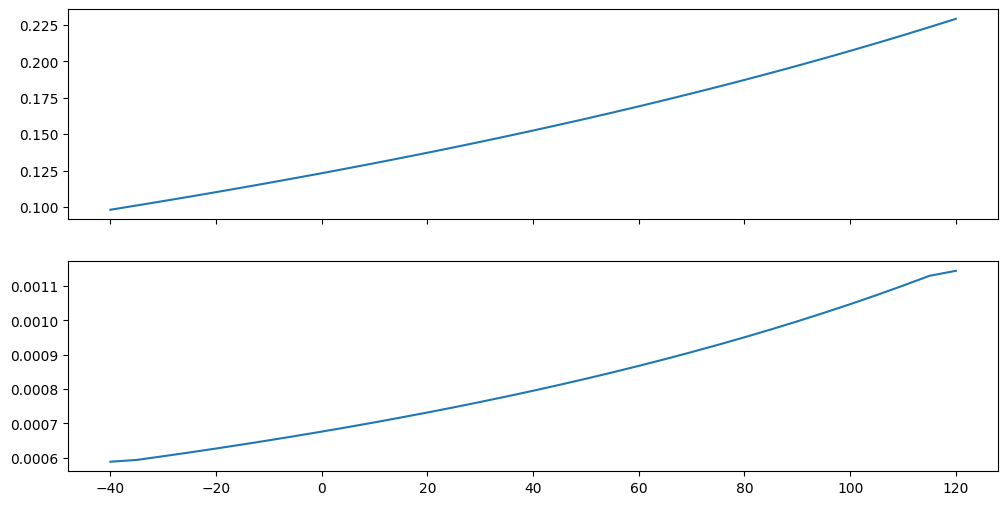

In [36]:
T = np.arange(-40,125,5)
deltav = model.calcDeltaVc(T)
vc = model.calcVc(T)

slope = deltav/vc
g_slope = np.gradient(slope,T)

fig,ax = plt.subplots(2,1,figsize=(12,6),sharex=True)
ax[0].plot(T,slope)
ax[1].plot(T,g_slope)
plt.show()


Plot the model versus expectation

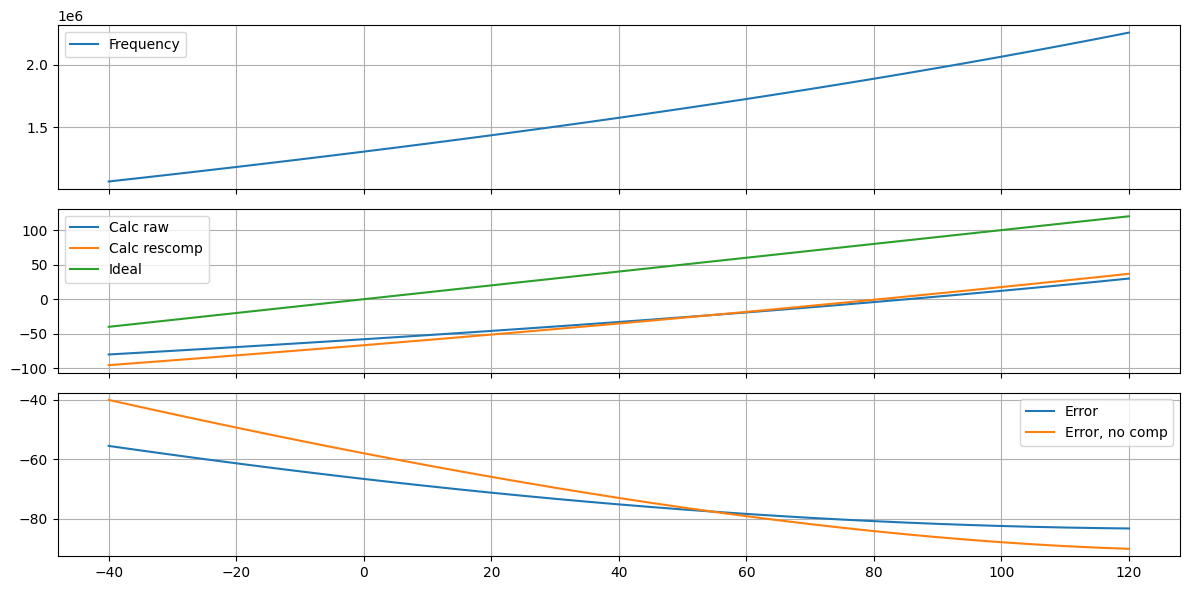

In [5]:
x = np.arange(-40,125,5)

fname = "sim/LELO_TEMP/output_tran/tran_SchGtKttTtVt.yaml"
havesim = False
if(os.path.exists(fname)):
    havesim = True
    with open(fname) as fi:
        obj  = yaml.safe_load(fi)

    temp = obj["temperature"]
    freqsim = obj["freq"]


fig,ax = plt.subplots(3,1,figsize=(12,6),sharex=True)
#ax = [ax]
freq = calcFreq(x)

ax[0].plot(x,freq,label="Frequency")
y1 = calcTemperatureFromFreq(freq)
ax[1].plot(x,y1,label="Calc raw")
y = calcTemperatureFromFreq(freq,compensate=True)
ax[1].plot(x,y,label="Calc rescomp")
ax[1].plot(x,x,label="Ideal")
ax[2].plot(x,y-x,label="Error")
ax[2].plot(x,y1-x,label="Error, no comp")
if(havesim):
    ax[0].plot(temp,freqsim,label="Simulated Frequency")

for a in ax:
    a.grid()
    a.legend()

plt.tight_layout()
